<a href="https://colab.research.google.com/github/Sujan-Sawant/Business-Case-Studies/blob/main/LoanTap_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

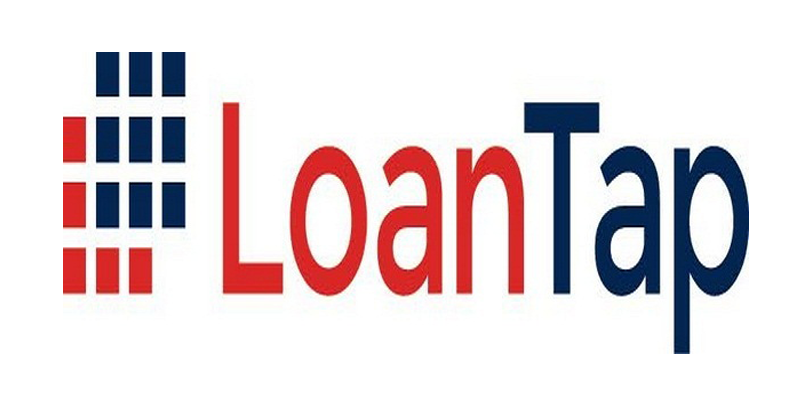

## <font color= Green>**Context:**</font>

**LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.**
**The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.**
**LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:**
1. 	**Personal Loan**
2.	**EMI Free Loan**
3.	**Personal Overdraft**
4.	**Advance Salary Loan**

##<font color = Red>**Business Problem:**

**This case study will focus on the underwriting process behind Personal Loan only**
**Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?**




## <font color = Green>**Data dictionary:** </font>
1.	**loan_amnt :** The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2.	**term :** The number of payments on the loan. Values are in months and can be either 36 or 60.
3.	**int_rate :** Interest Rate on the loan
4.	**installment :** The monthly payment owed by the borrower if the loan originates.
5.	**grade :** LoanTap assigned loan grade
6.	**sub_grade :** LoanTap assigned loan subgrade
7.	**emp_title :**The job title supplied by the Borrower when applying for the loan.
8.	**emp_length :** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9.	**home_ownership :** The home ownership status provided by the borrower during registration or obtained from the credit report.
10.	**annual_inc :** The self-reported annual income provided by the borrower during registration.
11.	**verification_status :** Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12.	**issue_d :** The month which the loan was funded
13.	**loan_status :** Current status of the loan - Target Variable
14.	**purpose :** A category provided by the borrower for the loan request.
15.	**title :** The loan title provided by the borrower
16.	**dti :** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17.	**earliest_cr_line :**The month the borrower's earliest reported credit line was opened
18.	**open_acc :** The number of open credit lines in the borrower's credit file.
19.	**pub_rec :** Number of derogatory public records
20.	**revol_bal :** Total credit revolving balance
21.	**revol_util :** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22.	**total_acc :** The total number of credit lines currently in the borrower's credit file
23.	**initial_list_status :** The initial listing status of the loan. Possible values are – W, F
24.	**application_type :** Indicates whether the loan is an individual application or a joint application with two co-borrowers
25.	**mort_acc :** Number of mortgage accounts.
26.	**pub_rec_bankruptcies :** Number of public record bankruptcies
27.	**Address:** Address of the individual


## <font color = Green> **Solution Approach** </font>
- **imported the dataset and performed the usual exploratory data analysis (EDA), checking the structure and characteristics of the dataset.**
- **Analyzed how much the target variable (Loan_Status) depends on different predictor variables by using visualizations like count plots, box plots, and heatmaps.**
- **Examined the correlation among independent variables and explored how they interact with each other.**
- **Carried out simple feature engineering steps, such as creating flags. For instance, I created binary flags where values greater than 1.0 were set to 1, and others to 0. This was applied to:**
 - **Pub_rec**
 - **Mort_acc**
 - **Pub_rec_bankruptcies**
- **Addressed missing values and handled outliers.**
- **Applied scaling techniques like MinMaxScaler or StandardScaler to standardize the features.**
- **I used a Logistic Regression model on the data and explained the results.**
- **Evaluated the model results using various metrics, including:**
 - **Classification report**
 - **ROC AUC curve**
 - **Precision-recall curve**
- **Provided actionable insights and recommendations based on findings.**




In [ ]:
# Downloding the data
!gdown 1OMA5FaMybdE-gUYKdDBCuqjV36ECkRva

Downloading...
From: https://drive.google.com/uc?id=1OMA5FaMybdE-gUYKdDBCuqjV36ECkRva
To: /content/logistic_regression.csv
100% 100M/100M [00:02<00:00, 47.6MB/s] 


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading or Loading a CSV file into a pandas DataFrame.
df = pd.read_csv("/content/logistic_regression.csv")

In [ ]:
# Viewing the first few rows of a DataFrame.
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
# Viewing the last few rows of a DataFrame.
df.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


## Exploratory Data Analysis and Data Cleaning (EDA)

In [ ]:
# Retrieving the dimensions of a DataFrame (Rows, Columns).
df.shape

(396030, 27)

In [ ]:
# Retrieving the column labels (names) of a DataFrame .
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
# df["term_months"] = df["term"].str.replace(" months", "", regex=False).str.strip()


In [ ]:
# df.rename(columns={"term":"term_months"},inplace = True)

In [ ]:
df["term_months"] = df["term"].str.replace(" months", "", regex=False).str.strip()
df["term_months"] = pd.to_numeric(df["term_months"], errors='coerce')


In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,term_months
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",36
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",36
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",36
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",36
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",60


In [ ]:
# Retrieving statistics of the numerical columns in a DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
# Retrieving statistics of the numerical columns in a DataFrame.
df.describe(include = "object").T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
# Create some features
df["pub_rec_bankruptcies_flag"] = df["pub_rec_bankruptcies"].apply(lambda x : 1 if x > 1 else 0)
df["pub_rec_flag"] = df["pub_rec"].apply(lambda x: 1 if x > 1 else 0)
df["mort_acc_flag"] = df["mort_acc"].apply(lambda x: 1 if x > 1 else 0)
df["Postal_code"] = df["address"].str.extract(r"(\d+)$")

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'term_months',
       'pub_rec_bankruptcies_flag', 'pub_rec_flag', 'mort_acc_flag',
       'Postal_code'],
      dtype='object')

In [ ]:
# Display the number of missing values (NaN) in each column of the DataFrame
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [ ]:
# Display the percentage of missing values
(df.isnull().sum()/df.shape[0]) * 100

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


##Since the missing values are not more than 5% lets drop the null values

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


## <font color = red> **Outliers Treatment**

### **Visual Analysis for Outliers:**


In [ ]:
numeric_columns = df.select_dtypes(include = np.number)
numeric_columns.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'term_months', 'pub_rec_bankruptcies_flag',
       'pub_rec_flag', 'mort_acc_flag'],
      dtype='object')

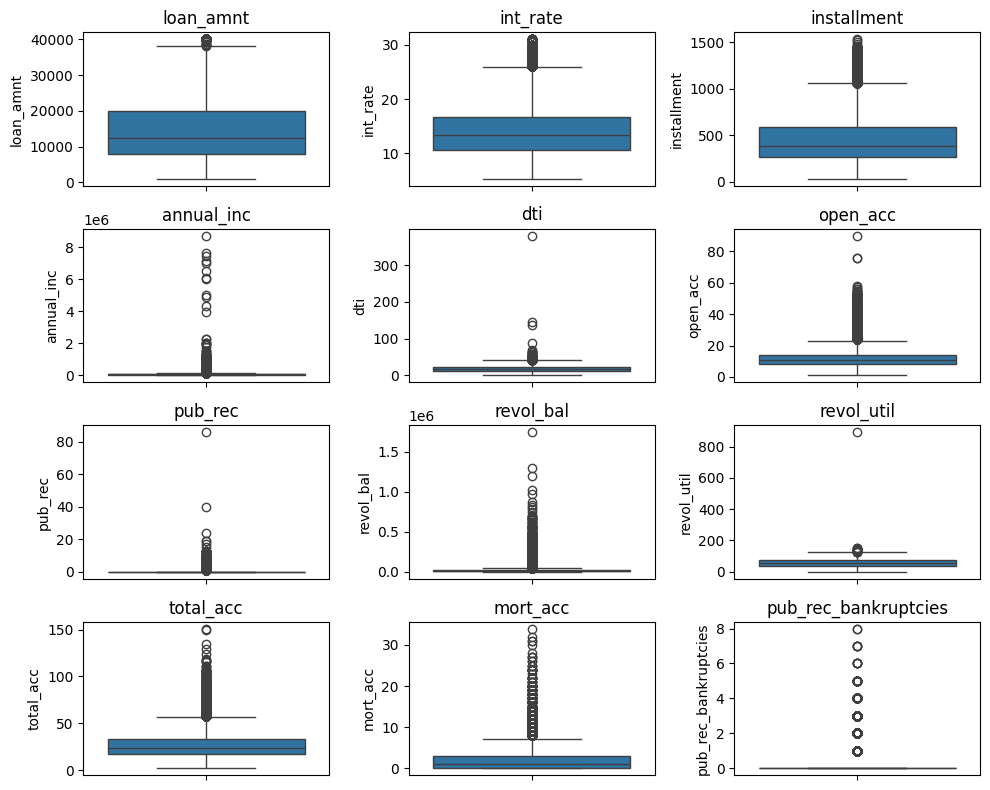

In [ ]:
numeric_columns = numeric_columns.drop(columns = ["term_months","pub_rec_bankruptcies_flag","pub_rec_flag","mort_acc_flag"])

plt.figure(figsize = (10,8))
for i,col in enumerate (numeric_columns.columns):
  plt.subplot(4,3,i+1)
  sns.boxplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outlier_counts = {}  # Dictionary to store outlier counts for each column

for col in numeric_columns.columns:
    outliers = identify_outliers(numeric_columns[col])
    outlier_counts[col] = len(outliers)

# Print the count of outliers for each numerical column
for col, count in outlier_counts.items():
    print(f"Percentage of outliers present in {col}: {round((count/df.shape[0]) * 100,3)}")


Percentage of outliers present in loan_amnt: 0.053
Percentage of outliers present in int_rate: 0.356
Percentage of outliers present in installment: 2.785
Percentage of outliers present in annual_inc: 4.645
Percentage of outliers present in dti: 0.058
Percentage of outliers present in open_acc: 2.876
Percentage of outliers present in pub_rec: 15.087
Percentage of outliers present in revol_bal: 5.28
Percentage of outliers present in revol_util: 0.004
Percentage of outliers present in total_acc: 1.583
Percentage of outliers present in mort_acc: 1.887
Percentage of outliers present in pub_rec_bankruptcies: 11.73


These are the % outliers present in the data and when I performed outlier treatment I loose almost 40% of data which is not ideal in training any model so lets take anothet approach and fill the outliers values with median values

In [ ]:
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound, data[(data < lower_bound) | (data > upper_bound)]

outlier_counts = {}  # Dictionary to store outlier counts for each column

for col in numeric_columns.columns:
    # Identify outliers for each column and get bounds
    lower_bound, upper_bound, outliers = identify_outliers(numeric_columns[col])
    outlier_counts[col] = len(outliers)

    # Calculate percentage of outliers
    print(f"Percentage of outliers present in {col}: {round((outlier_counts[col] / df.shape[0]) * 100, 3)}%")


   # Calculatr median values for the respective columns
    median_values =  numeric_columns[col].median()

    # Fill the outlier values with median values
    numeric_columns[col] = numeric_columns[col].apply(lambda x: median_values if x < lower_bound or x > upper_bound else x )



Percentage of outliers present in loan_amnt: 0.053%
Percentage of outliers present in int_rate: 0.356%
Percentage of outliers present in installment: 2.785%
Percentage of outliers present in annual_inc: 4.645%
Percentage of outliers present in dti: 0.058%
Percentage of outliers present in open_acc: 2.876%
Percentage of outliers present in pub_rec: 15.087%
Percentage of outliers present in revol_bal: 5.28%
Percentage of outliers present in revol_util: 0.004%
Percentage of outliers present in total_acc: 1.583%
Percentage of outliers present in mort_acc: 1.887%
Percentage of outliers present in pub_rec_bankruptcies: 11.73%


### **Visualization:**

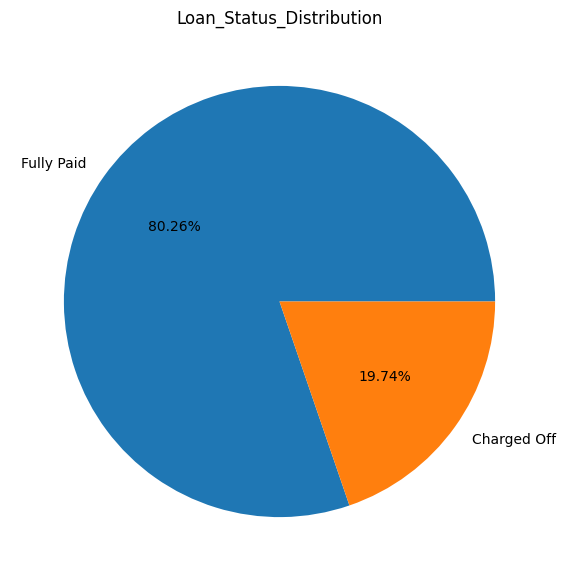

In [ ]:
loan = df["loan_status"].value_counts()

plt.figure(figsize=(10,7))
plt.pie(loan,labels = loan.index,autopct = "%1.2f%%")
plt.title("Loan_Status_Distribution")
plt.show()

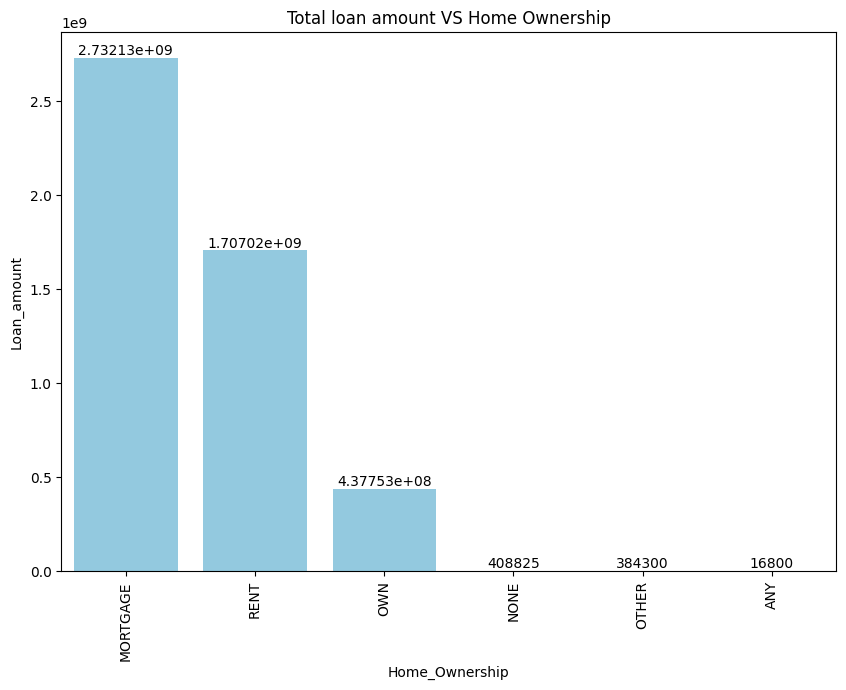

In [ ]:
home_ownership= df.groupby("home_ownership")["loan_amnt"].sum().sort_values(ascending = False)

plt.figure(figsize=(10,7))
ax = sns.barplot(x=home_ownership.index,y=home_ownership,color="skyblue")
for val in ax.containers:
  ax.bar_label(val)
plt.xlabel("Home_Ownership")
plt.ylabel("Loan_amount")
plt.title("Total loan amount VS Home Ownership")
plt.xticks(rotation = 90)
plt.show()

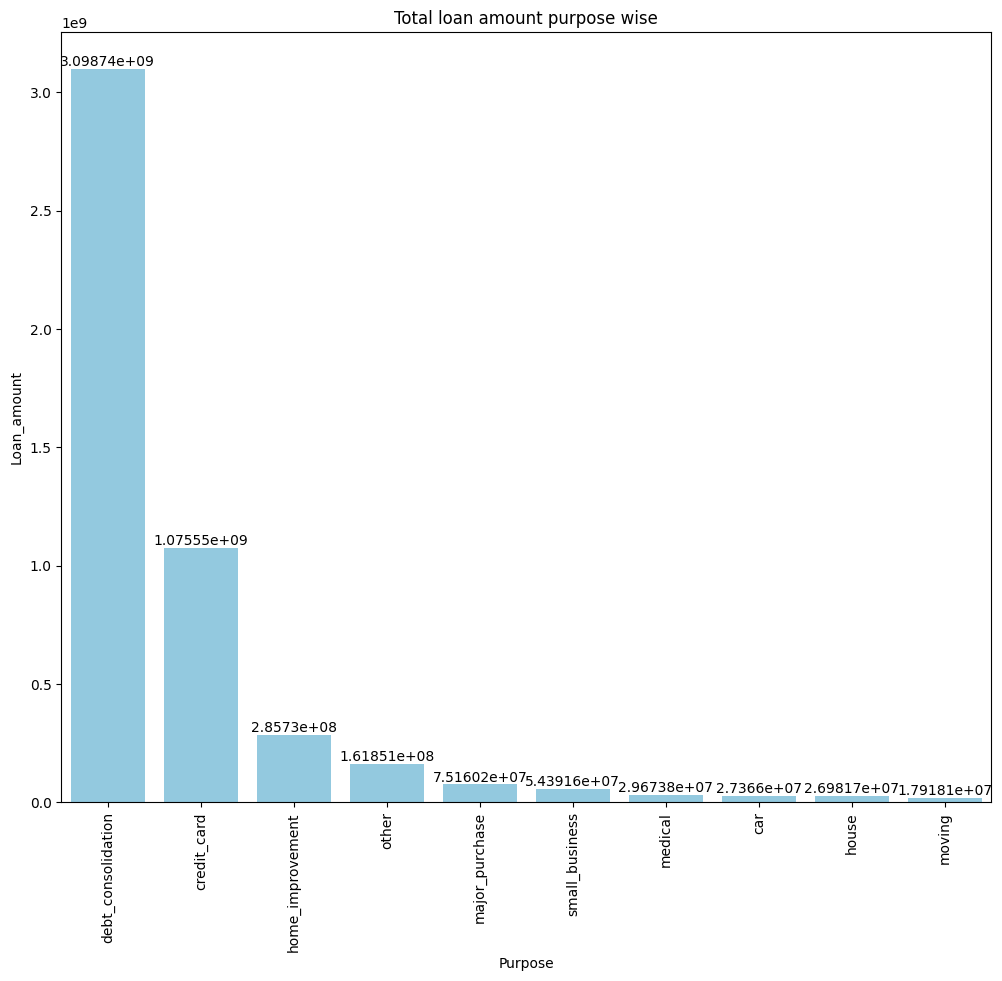

In [ ]:
Total_loan_amount_purpose= df.groupby("purpose")["loan_amnt"].sum().sort_values(ascending = False).head(10)


plt.figure(figsize=(12,10))
ax = sns.barplot(x=Total_loan_amount_purpose.index,y=Total_loan_amount_purpose,color="skyblue")
for val in ax.containers:
  ax.bar_label(val)
plt.xlabel("Purpose")
plt.ylabel("Loan_amount")
plt.title("Total loan amount purpose wise")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
len(df["emp_title"].unique())

150832

In [ ]:
top_10_loan_borrower_profession= df.groupby("emp_title")["loan_amnt"].sum().sort_values(ascending = False).head(10)
top_10_loan_borrower_profession

,loan_amnt
emp_title,
Manager,64790075.0
Teacher,60648850.0
Registered Nurse,30294075.0
RN,29848575.0
Project Manager,25847325.0
Supervisor,25807950.0
Sales,24076625.0
Owner,23838700.0
Director,20837000.0


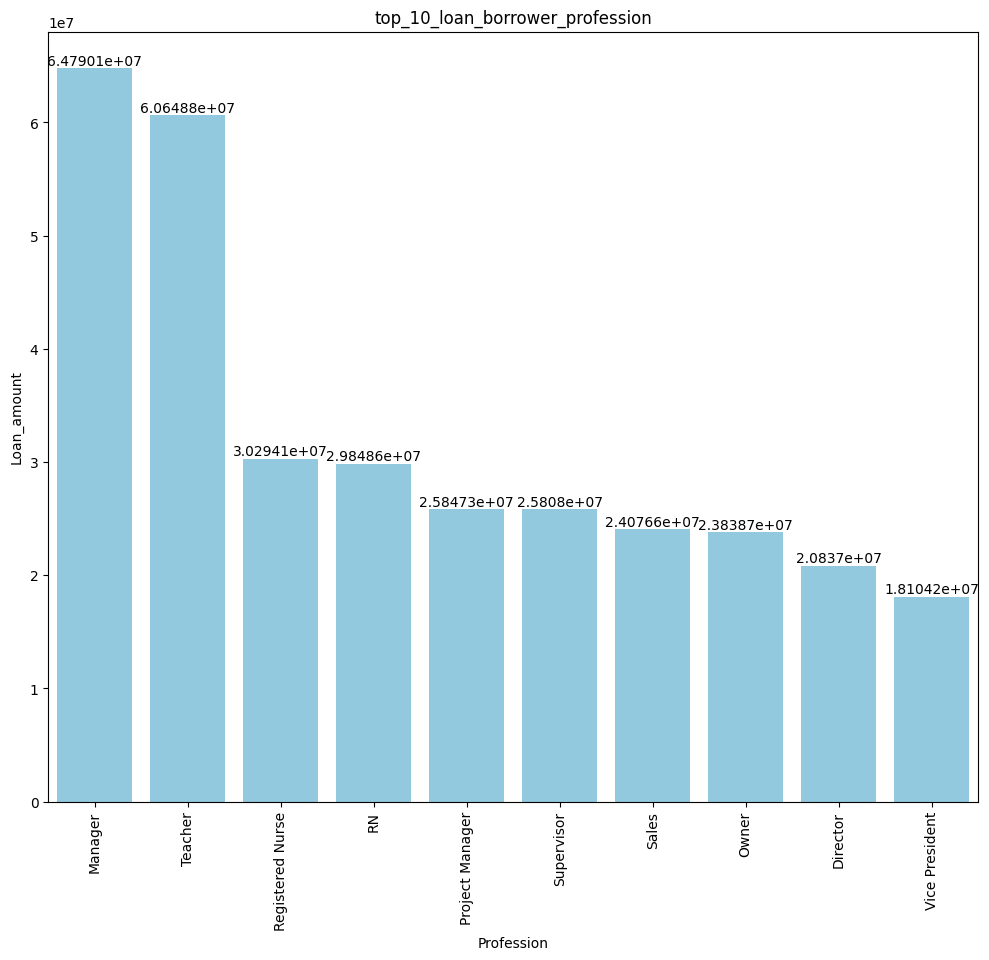

In [ ]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x=top_10_loan_borrower_profession.index,y=top_10_loan_borrower_profession,color="skyblue")
for val in ax.containers:
  ax.bar_label(val)
plt.xlabel("Profession")
plt.ylabel("Loan_amount")
plt.title("top_10_loan_borrower_profession")
plt.xticks(rotation = 90)
plt.show()

### **Now lets perform encoding on categorical columns**

In [ ]:
df["term_month"] = df["term"].str.replace(" months", "", regex=False).str.strip()
df["emp_length_years"] = df["emp_length"].str.replace("years","").str.replace("year","").str.replace("<","").str.replace("+","",regex=False).str.strip()

In [ ]:
df.drop(columns=["term","emp_length","address"],inplace=True)

In [ ]:
df.select_dtypes(include="object").columns

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'Postal_code', 'term_month', 'emp_length_years'],
      dtype='object')

In [ ]:
df.shape

(335867, 31)

In [ ]:
df["loan_status"].value_counts()/df.shape[0] * 100

,count
loan_status,
Fully Paid,80.256471
Charged Off,19.743529


In [ ]:
df["loan_status"].value_counts()

,count
loan_status,
Fully Paid,269555
Charged Off,66312


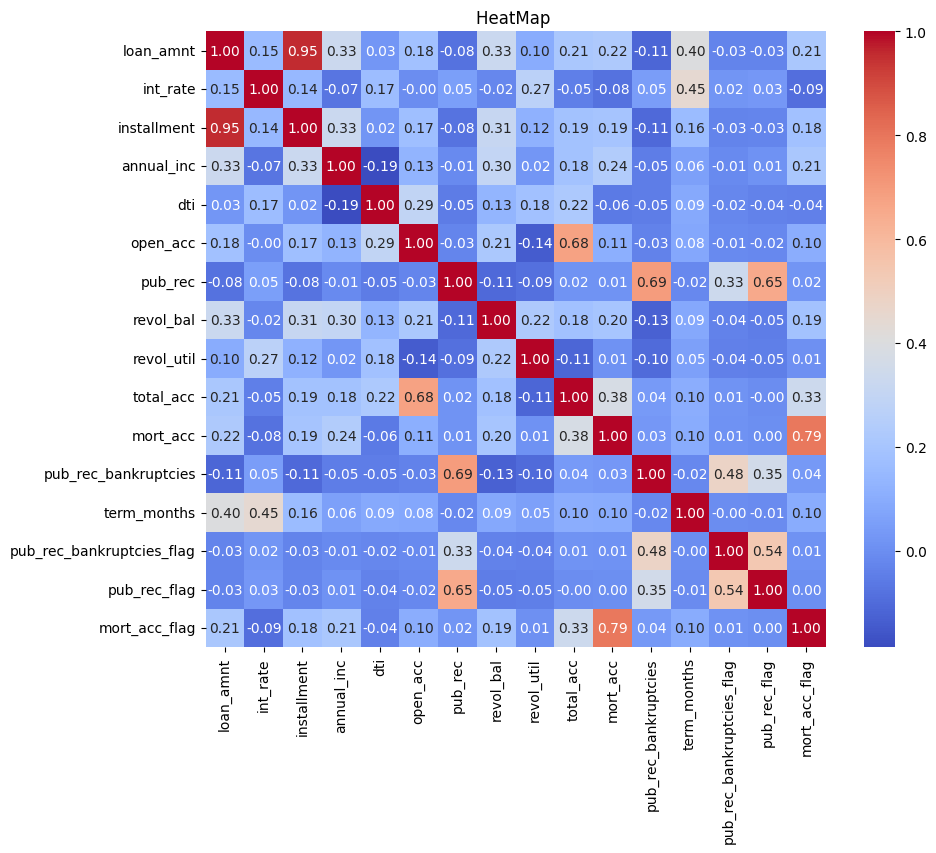

In [ ]:
# Check Correlation
plt.figure(figsize=(10,8))
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("HeatMap ")
plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include ="object").columns
categorical_cols

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'Postal_code', 'term_month', 'emp_length_years'],
      dtype='object')

## **Feature Engineering:**

## **Encoding:**

Convert categorical columns into numeric


####  **label Encoding:**  
 - grade
 - sub_grade
 - loan_status
 - initial_list_status
 - application_type
 - term_month
 - emp_length_years

####  **One Hot Encoding:**  
 - home_ownership
 - verification_status
 - purpose
 - Postal_code

####  **Target Encoding:**  
- earliest_cr_line

In [ ]:
# Remove the unnecessary columns.
df.drop(columns = ["emp_title","issue_d","title","earliest_cr_line"],inplace = True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, TargetEncoder

one_hot_cols = ["home_ownership", "verification_status", "purpose", "Postal_code"]
one = OneHotEncoder(sparse_output=False)
for col in one_hot_cols:
  df[col] = one.fit_transform(df[one_hot_cols])

label_cols = ["grade", "sub_grade", "loan_status", "initial_list_status", "application_type", "term_month", "emp_length_years"]
label = LabelEncoder()
for col in label_cols:
  df[col] = label.fit_transform(df[col])

In [ ]:
df.select_dtypes(include="object").columns

Index([], dtype='object')

In [ ]:
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,application_type,mort_acc,pub_rec_bankruptcies,term_months,pub_rec_bankruptcies_flag,pub_rec_flag,mort_acc_flag,Postal_code,term_month,emp_length_years
0,10000.0,11.44,329.48,1,8,0.0,117000.0,1.0,1,1.0,...,1,0.0,0.0,36,0,0,0,1.0,0,1
1,8000.0,11.99,265.68,1,9,0.0,65000.0,1.0,1,1.0,...,1,3.0,0.0,36,0,0,1,1.0,0,4
2,15600.0,10.49,506.97,1,7,0.0,43057.0,1.0,1,1.0,...,1,0.0,0.0,36,0,0,0,1.0,0,0
3,7200.0,6.49,220.65,0,1,0.0,54000.0,1.0,1,1.0,...,1,0.0,0.0,36,0,0,0,1.0,0,6
4,24375.0,17.27,609.33,2,14,0.0,55000.0,1.0,0,1.0,...,1,1.0,0.0,60,0,0,0,1.0,1,9


## **Mapped loan status target variable as**
 - **full paid as 1**
 - **charged off as 0**

In [ ]:
df["loan_status"].value_counts()

,count
loan_status,
1,269555
0,66312


## **Check for Imbalance Data**

In [ ]:
df["loan_status"].value_counts()/df.shape[0]*100

,count
loan_status,
1,80.256471
0,19.743529


### **Since the data is not highly imbalanced (i.e., no class represents more than 90-95% of the total), we do not apply data imputation.**

In [ ]:
# Assigning Feature and Target Variable
X = df.drop(columns = ["loan_status"])
y = df["loan_status"]

In [ ]:
# Split the data into train and test and then train and validation
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [ ]:
# Standadize the data and fit the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_val)

print("coef = ",model.coef_)
print("intercept = ",model.intercept_)

coef =  [[ 0.08805262  0.62525441 -0.14330839  0.03573525 -1.12091495  0.
   0.16828323  0.          0.         -0.19497404 -0.09490614 -0.06108967
   0.07252147 -0.0902201   0.09648094  0.03117161  0.00722276  0.0815578
   0.04417707 -0.10603959 -0.02120121  0.02010442  0.05946681  0.
  -0.10603959 -0.00423129]]
intercept =  [1.56850223]


###<font color = "yellow">**Feature Importance:**</font> Lets check which feature are most important to predict target variable

In [ ]:
coefficients = model.coef_[0]
coef_map = pd.DataFrame({
    'Features': X.columns,
    'Coefficient': coefficients
})
coef_map

,Features,Coefficient
0,loan_amnt,0.088053
1,int_rate,0.625254
2,installment,-0.143308
3,grade,0.035735
4,sub_grade,-1.120915
5,home_ownership,0.000000
6,annual_inc,0.168283
7,verification_status,0.000000
8,purpose,0.000000
9,dti,-0.194974


In [ ]:
coef_map.sort_values(by="Coefficient",ascending=False)

,Features,Coefficient
1,int_rate,0.625254
6,annual_inc,0.168283
14,total_acc,0.096481
0,loan_amnt,0.088053
17,mort_acc,0.081558
12,revol_bal,0.072521
22,mort_acc_flag,0.059467
18,pub_rec_bankruptcies,0.044177
3,grade,0.035735
15,initial_list_status,0.031172


 ### **Features like *'home_ownership'*, *'verification_status'*, *'purpose'*, *'postal_code'* has coefficient exactly zero that indicates that those features do not contribute to the model's predictions.**





### **Lets check Classification Metrics:**

In [ ]:
# Training
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train,y_train_pred)
train_precision = precision_score(y_train,y_train_pred)
train_recall = recall_score(y_train,y_train_pred)
train_f1 = f1_score(y_train,y_train_pred)

# Validation
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val,y_val_pred)
val_precision = precision_score(y_val,y_val_pred)
val_recall = recall_score(y_val,y_val_pred)
val_f1 = f1_score(y_val,y_val_pred)

# Test
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test,y_test_pred)
test_precision = precision_score(y_test,y_test_pred)
test_recall = recall_score(y_test,y_test_pred)
test_f1 = f1_score(y_test,y_test_pred)

# Confusion matrix for each dataset
train_cm = confusion_matrix(y_train, y_train_pred)
val_cm = confusion_matrix(y_val, y_val_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Training Set Performance:")
print(f"Training Accuracy   : {train_accuracy}")
print(f"Training Precision  : {train_precision}")
print(f"Training Recall     : {train_recall}")
print(f"Training F1         : {train_f1}")
print(f"Confusion Matrix:\n{train_cm}\n")

print(f"Validation Set Performance:")
print(f"Validation Accuracy : {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall   : {val_recall}")
print(f"Validation F1       : {val_f1}")
print(f"Confusion Matrix:\n{val_cm}\n")

print(f"Test Set Performance:")
print(f"Test Accuracy       : {test_accuracy}")
print(f"Test Precision      : {test_precision}")
print(f"Test Recall         : {test_recall}")
print(f"Test F1             : {test_f1}")
print(f"Confusion Matrix:\n{test_cm}")


Training Set Performance:
Training Accuracy   : 0.804281482143123
Training Precision  : 0.8145515517471943
Training Recall     : 0.9790732898519365
Training F1         : 0.8892669738138755
Confusion Matrix:
[[  3708  36056]
 [  3385 158370]]

Validation Set Performance:
Validation Accuracy : 0.8047756572483401
Validation Precision: 0.8142575234336458
Validation Recall   : 0.9802160276159014
Validation F1       : 0.8895625957927004
Confusion Matrix:
[[ 1244 12048]
 [ 1066 52816]]

Test Set Performance:
Test Accuracy       : 0.8037335873998869
Test Precision      : 0.8141310383120489
Test Recall         : 0.978986609295597
Test F1             : 0.8889805817067215
Confusion Matrix:
[[ 1205 12051]
 [ 1133 52785]]


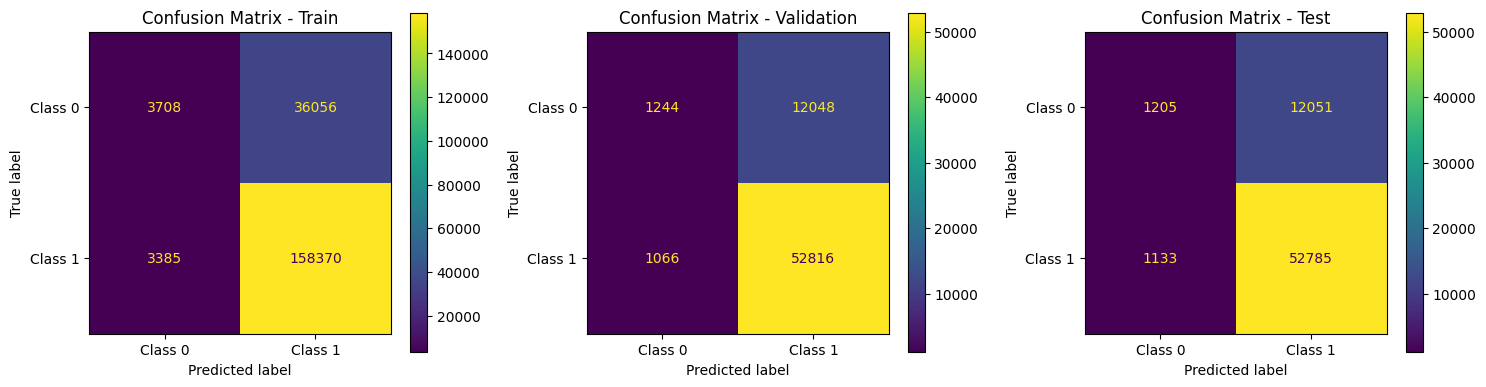

In [ ]:
confusion_matrices = [train_cm, val_cm, test_cm]
titles = ['Train', 'Validation', 'Test']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, cm in enumerate(confusion_matrices):
    # Display the confusion matrix for each dataset
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    disp.plot(ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {titles[i]}')
plt.tight_layout()
plt.show()


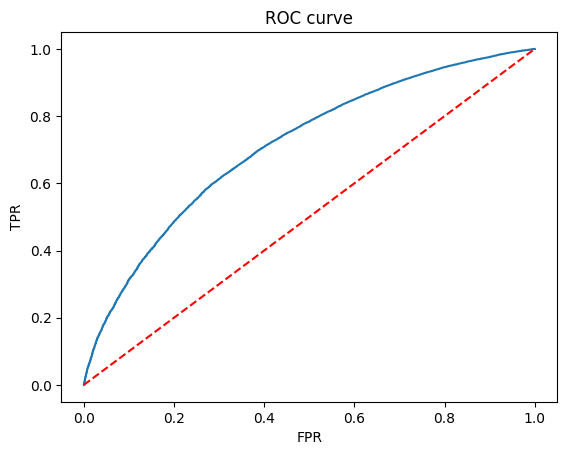

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
prob = model.predict_proba(X_test)
probabilites = prob[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


### **Hyper-Parameter Tunning**

In [ ]:
train_scores = []
val_scores = []
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  model2 = LogisticRegression(C=1/la)
  model2.fit(X_train, y_train)
  train_score = accuracy_score(y_train, model2.predict(X_train))
  val_score = accuracy_score(y_val, model2.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

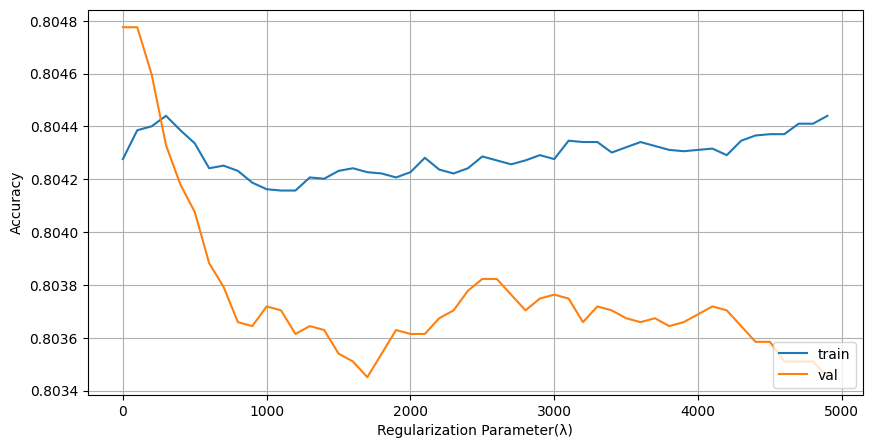

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
model3 = LogisticRegression(C=1/250)
model3.fit(X_train, y_train)

print("Train acc = ",accuracy_score(y_train, model3.predict(X_train)))

print("Val acc = ",accuracy_score(y_val, model3.predict(X_val)))

print("Test acc = ",accuracy_score(y_test, model3.predict(X_test)))

print("Test F1 Score = ", f1_score(y_test,model3.predict(X_test)))

Train acc =  0.8043509545005681
Val acc =  0.8044481495816834
Test acc =  0.8038377943847322
Test F1 Score =  0.8891823021352822


## <font color = "Orange">**Inference**</font>

Questionnaire
1.	What percentage of customers have fully paid their Loan Amount?
 - ans: Around 80.26% of customers have fully paid their Loan Amount.
2.	Comment about the correlation between Loan Amount and Installment features.
 - The statistic between Loan Amount and Installment is 0.95 (i.e 95%) which indicates both features are highly correlated.
3.	The majority of people have home ownership as _______.
 -  The majority of people have home ownership as MORTGAGE.which is 50.08 % followed by rent which is 40.34 %.
4.	People with grades ‘A’ are more likely to fully pay their loan. (T/F)
 -  True. Out of all people with grade 'A',  ~ 92-93% got their loan approved.
5.	Name the top 2 afforded job titles.
 -  Teacher and Manager.
6.	Thinking from a bank's perspective, which metric should our primary focus be on..
 - ROC AUC
 - Precision
 - Recall
 - F1 Score
 - ans: From a bank's perspective, the **F1 score** should be prioritized. Choosing Recall means focusing on capturing all defaulters, but this could result in rejecting potential customers who may not actually be risky. On the other hand, choosing Precision increases the likelihood of approving loans for good customers, but it may also lead to approving loans for some defaulters. Therefore, it is important to consider both Precision and Recall, which is why the F1 score should be the primary metric of focus.




7.	How does the gap in precision and recall affect the bank?
 - ans:
 1. High Recall (0.979): The bank is doing a good job of identifying potential defaulters (high Recall means fewer risky customers are missed). This is important for minimizing financial risk and preventing losses due to defaults. However, this also suggests the bank is very cautious and may be overly strict in identifying defaulters.
 2. Lower Precision (0.814): The lower Precision indicates that while the bank is catching most defaulters, it is also approving loans for some customers who are actually risky (false positives). This could lead to missed opportunities, where good customers who would reliably repay loans are rejected.
 3.How the gap affects the bank:
Financial Impact: The bank might be rejecting some good customers (opportunity loss) while still approving loans to some risky ones (potential losses). This imbalance could affect profitability and customer satisfaction.



8.	Which were the features that heavily affected the outcome?
 -  Few important features are
   - int_rate
 - annual_inc
 - total_acc
 - loan_amnt
 - mort_acc
 - revol_bal
 - term_months
 - term_month
 - installment
 - dti
 - sub_grade
9.	Will the results be affected by geographical location? (Yes/No)
- Yes

10. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
 - ans:
 1. **Adjust the Classification Threshold :** The model's decision threshold (i.e., the probability above which a person is classified as a defaulter) can significantly impact Precision and Recall. By adjusting the threshold, you can increase Precision (reduce false positives) at the cost of Recall, or vice versa. You might want to experiment with different threshold values and choose one that balances the detection of defaulters and minimizes the approval of risky candidates.
 2. **Model Selection and Hyperparameter Tuning :** Experiment with different machine learning models. Also Hyperparameter tuning can also play a key role. Tuning parameters such as regularization strength or learning rate can help the model generalize better and avoid overfitting, which may otherwise result in high false positives.

 11. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.
  - ans: Non-Performing Assets (NPAs) are a real challenge in the lending industry, it’s understandable that you may want to prioritize safety and avoid disbursing loans to individuals who might default.
  Tackle this -  Use advanced machine learning models and data analytics to better predict the likelihood of default, Adjust the Threshold for Approval etc.





### <font color = Red>**Observations and Recommendations**</font>

<font color = orange>**Test Statistics** </font>
- Test Accuracy       : 0.8037335873998869
- Test Precision      : 0.8141310383120489
- Test Recall         : 0.978986609295597
- Test F1             : 0.8889805817067215


<font color = orange>**Key Observations from the Test Performance:**</font>
1. **High Recall (97.90%):** The model performs well in identifying defaulters . However, the high recall indicates that while it catches almost all defaulters, it might also approve loans for some non-risky customers who will be wrongly classified as defaulters. This can lead to missed opportunities for LoanTap to finance good customers.

2. **Moderate Precision (81.41%):** The precision score suggests that about 81% of the customers identified as defaulters by the model are actual defaulters. While this is relatively good, there is still a significant number of false positives, i.e., customers who are wrongly classified as defaulters when they are actually creditworthy.

3. **F1 Score (88.90%):** The F1 score of 88.90% shows a solid balance between precision and recall, which indicates that the model is relatively good at both identifying defaulters and minimizing false positives. However, there's still a gap that could be further reduced to improve overall performance.

<font color = orange>**Recommendations for LoanTap:**</font>
1. **Implement Slightly Stringent Rules for Loan Approval:** Since 20% of customers are defaulters, which is high for personal loans, LoanTap should implement slightly stricter loan approval rules. This could include better credit scoring, behavioral analysis, or collateral requirements. By aiming for a default rate of around 5% to 6%, LoanTap can significantly reduce the risk of NPAs.

2. **Increase Loan Interest Rates for Higher Risk Customers:** To manage the risk of defaulters, LoanTap could offer loans at a slightly higher interest rate than other banks. This would help maintain profitability while taking on more risk from higher-risk borrowers.




## Thank You !! -----------------------------------------------------------